# Machine Learning - Exercise 6
# Linear/kernel Regression

Example adapted from 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

## Import libraries and load data set

Using [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

For visualization purposes, data set is reduced to 1 dimension.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

print('Dataset: diabetes')
print('Number of features: %d' %diabetes.data.shape[1])
print('Number of samples: %d' %diabetes.data.shape[0])

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print('Training set size: %d' %len(diabetes_X_train))
print('Test set size: %d' %len(diabetes_X_test))

print('Target range: [%.1f, %.1f]' %(min(diabetes.target),max(diabetes.target)))

Dataset: diabetes
Number of features: 10
Number of samples: 442
Training set size: 422
Test set size: 20
Target range: [25.0, 346.0]


## Train regression model

*   Linear regression ([info](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))
*   SVM with linear kernel ([info](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html))
*   SVM with polynomial kernel ([info](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html))




In [2]:
model_type = "linear_regression"  # "linear_regression", "linear_svm", "poly_svm"

if model_type == "linear_regression":
  # Create linear regression object
  model = linear_model.LinearRegression()
  # Train the model using the training sets
  model.fit(diabetes_X_train, diabetes_y_train)

elif model_type == "linear_svm":
  # SVM regression
  model = SVR(kernel='linear', C=1.5)
  # Train the model using the training sets
  model.fit(diabetes_X_train, diabetes_y_train)

elif model_type == "poly_svm":
  # SVM polynomial regression
  model = SVR(kernel='poly', C=1.5, degree=3, gamma='scale')
  # Train the model using the training sets
  model.fit(diabetes_X_train, diabetes_y_train)


## Prediction

In [3]:
# Make predictions using the testing set
diabetes_y_pred = model.predict(diabetes_X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# R2 regression score: 1 is perfect prediction
print('Regression score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))


Mean squared error: 2548.07
Regression score: 0.47


## Plot results

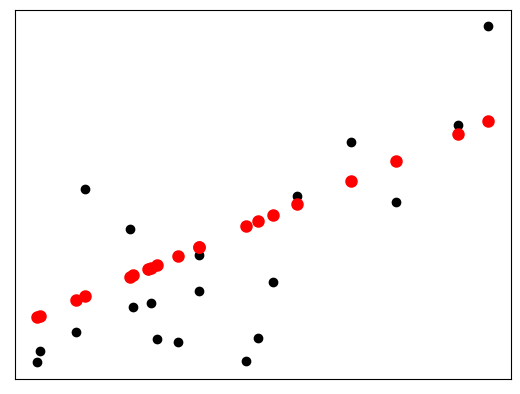

In [4]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.scatter(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

# Home Exercises

Tune the SVM regressors on a held-out validation set.


**Question 1**

Consider the hyper-parameter C in the Linear SVM and plot the testing performance as the paramater varies.

Mean squared error with C = 1.5 : 4988.16
Mean squared error with C = 5.0 : 4842.50
Mean squared error with C = 0.2 : 5054.90
Regression score with C = 1.5 : -0.03
Regression score with C = 5.0 : -0.00
Regression score with C = 0.2 : -0.05


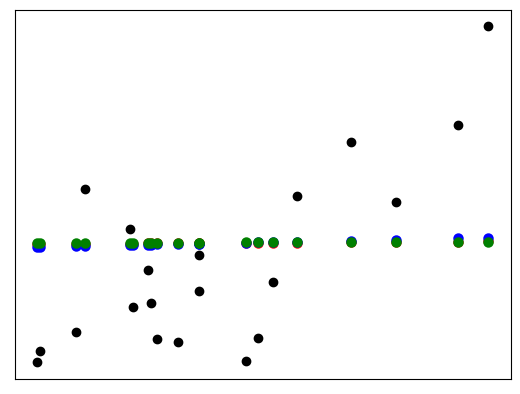

In [5]:
regularization_1 = 1.5
regularization_2 = 5.0
regularization_3 = 0.2

model_1 = SVR(kernel='linear', C=regularization_1)
model_2 = SVR(kernel='linear', C=regularization_2)
model_3 = SVR(kernel='linear', C=regularization_3)

# Train the model using the training sets
model_1.fit(diabetes_X_train, diabetes_y_train)
model_2.fit(diabetes_X_train, diabetes_y_train)
model_3.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred_1 = model_1.predict(diabetes_X_test)
diabetes_y_pred_2 = model_2.predict(diabetes_X_test)
diabetes_y_pred_3 = model_3.predict(diabetes_X_test)

# The mean squared error
print("Mean squared error with C = %.1f : %.2f" % (regularization_1, mean_squared_error(diabetes_y_test, diabetes_y_pred_1)))
print("Mean squared error with C = %.1f : %.2f" % (regularization_2, mean_squared_error(diabetes_y_test, diabetes_y_pred_2)))
print("Mean squared error with C = %.1f : %.2f" % (regularization_3, mean_squared_error(diabetes_y_test, diabetes_y_pred_3)))

# R2 regression score: 1 is perfect prediction
print('Regression score with C = %.1f : %.2f' % (regularization_1, r2_score(diabetes_y_test, diabetes_y_pred_1)))
print('Regression score with C = %.1f : %.2f' % (regularization_2, r2_score(diabetes_y_test, diabetes_y_pred_2)))
print('Regression score with C = %.1f : %.2f' % (regularization_3, r2_score(diabetes_y_test, diabetes_y_pred_3)))

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.scatter(diabetes_X_test, diabetes_y_pred_1, color='red', linewidth=1.5)
plt.scatter(diabetes_X_test, diabetes_y_pred_2, color='blue', linewidth=1.5)
plt.scatter(diabetes_X_test, diabetes_y_pred_3, color='green', linewidth=1.5)
plt.xticks(())
plt.yticks(())
plt.show()



**Question 2**

Consider the hyper-parameters C and degree of the polynomial in the Polynomial SVM. Perform a grid search and show the obtained results.

Mean squared error with C = 1.0 and degree = 3 : 3174.68
Mean squared error with C = 3.0 and degree = 1 : 2308.89
Mean squared error with C = 7.0 and degree = 7 : 4968.84
Regression score with C = 1.0 and degree = 3 : 0.34
Regression score with C = 3.0 and degree = 1 : 0.52
Regression score with C = 7.0 and degree = 7 : -0.03


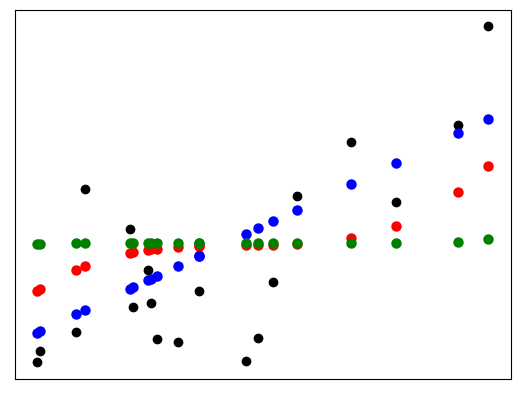



Grid Search for Regression


Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
GridSearchCV(cv=5, estimator=SVR(kernel='poly'), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'degree': array([1, 2, 3, 4, 5, 6]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='r2', verbose=1)
Best regression hyper-parameters: {'C': 2.5000000000000004, 'degree': 1, 'kernel': 'poly'}
Best R2 score: 0.31


In [17]:
from sklearn.model_selection import GridSearchCV

regularization_1 = 1.0
regularization_2 = 3.0
regularization_3 = 7.0
degree_1 = 3
degree_2 = 1
degree_3 = 7

model_1 = SVR(kernel='poly', C=regularization_1, degree=degree_1, gamma='scale')
model_2 = SVR(kernel='poly', C=regularization_2, degree=degree_2, gamma='scale')
model_3 = SVR(kernel='poly', C=regularization_3, degree=degree_3, gamma='scale')

# Train the model using the training sets
model_1.fit(diabetes_X_train, diabetes_y_train)
model_2.fit(diabetes_X_train, diabetes_y_train)
model_3.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred_1 = model_1.predict(diabetes_X_test)
diabetes_y_pred_2 = model_2.predict(diabetes_X_test)
diabetes_y_pred_3 = model_3.predict(diabetes_X_test)

# The mean squared error
print("Mean squared error with C = %.1f and degree = %.0f : %.2f" % (regularization_1, degree_1, mean_squared_error(diabetes_y_test, diabetes_y_pred_1)))
print("Mean squared error with C = %.1f and degree = %.0f : %.2f" % (regularization_2, degree_2, mean_squared_error(diabetes_y_test, diabetes_y_pred_2)))
print("Mean squared error with C = %.1f and degree = %.0f : %.2f" % (regularization_3, degree_3, mean_squared_error(diabetes_y_test, diabetes_y_pred_3)))

# R2 regression score: 1 is perfect prediction
print('Regression score with C = %.1f and degree = %.0f : %.2f' % (regularization_1, degree_1, r2_score(diabetes_y_test, diabetes_y_pred_1)))
print('Regression score with C = %.1f and degree = %.0f : %.2f' % (regularization_2, degree_2, r2_score(diabetes_y_test, diabetes_y_pred_2)))
print('Regression score with C = %.1f and degree = %.0f : %.2f' % (regularization_3, degree_3, r2_score(diabetes_y_test, diabetes_y_pred_3)))

plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.scatter(diabetes_X_test, diabetes_y_pred_1, color='red', linewidth=1.5)
plt.scatter(diabetes_X_test, diabetes_y_pred_2, color='blue', linewidth=1.5)
plt.scatter(diabetes_X_test, diabetes_y_pred_3, color='green', linewidth=1.5)
plt.xticks(())
plt.yticks(())
plt.show()

# In this case we perform a Grid Sear
grid_search_regression = GridSearchCV(model_1,
                          # Here you can choose the parameters that you want to fit in the gridsearch.
                          # In this case the gridsearch will find the best combination between 'C' and 'kernel'
                           {
                                'C':np.arange(0.1,5,0.1),
                                #'kernel': ['poly'],                            
                                'kernel': ('linear', 'rbf','poly','sigmoid'),
                                'degree': np.arange(1,7,1),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
print("\n\nGrid Search for Regression\n\n")
print(grid_search_regression.fit(diabetes_X_train,diabetes_y_train))

#Best parameters for the regressor
print("Best regression hyper-parameters: %r" %grid_search_regression.best_params_)
print("Best R2 score: %.2f" %grid_search_regression.best_score_)
